In [7]:
import matplotlib.pyplot as plt
import requests
# import asyncio
# import nest_asyncio
import copy
import numpy as np
import os
import time
import random
import concurrent.futures
# nest_asyncio.apply()  # Enable nested asyncio support

In [8]:
docker_url = "http://localhost:5000"

### A-1. Default configuration with 6 servers, 4 shards, 3 replicas

In [12]:
payload = {
    "N": 6,
    "schema": {
        "columns": ["Stud_id", "Stud_name", "Stud_marks"],
        "dtypes": ["Number", "String", "Number"],
    },
    "shards": [
        {"Stud_id_low": 0, "Shard_id": "sh1", "Shard_size": 4096},
        {"Stud_id_low": 4096, "Shard_id": "sh2", "Shard_size": 4096},
        {"Stud_id_low": 8192, "Shard_id": "sh3", "Shard_size": 4096},
        {"Stud_id_low": 12288, "Shard_id": "sh4", "Shard_size": 4096},
    ],
    "servers": {
        "Server0": ["sh1", "sh2"],
        "Server1": ["sh3", "sh4"],
        "Server2": ["sh1", "sh3"],
        "Server3": ["sh4", "sh2"],
        "Server4": ["sh1", "sh4"],
        "Server5": ["sh3", "sh2"],
    },
}
res = requests.post(f"{docker_url}/init", json=payload)
print(res.json())

{'message': 'Configured Database', 'status': 'success'}


In [13]:
num_requests = 10000

write_times, read_times = [], []
max_stud_id = 16383


def make_read_request():
    low = random.randint(0, max_stud_id)
    payload = {"Stud_id": {"low": low, "high": low + 50}}
    start_time = time.time()
    res = requests.get(f"{docker_url}/read", json=payload)
    read_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in read")


def make_write_request():
    payload = {
        "data": [
            {
                "Stud_id": random.randint(0, max_stud_id),
                "Stud_name": "GHI",
                "Stud_marks": random.randint(0, 100),
            },
        ]
    }
    start_time = time.time()
    res = requests.post(f"{docker_url}/write", json=payload)
    write_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in write")


for i in range(num_requests):
    make_read_request()
    make_write_request()
    if i % 1000 == 0:
        print(f"Remaining {num_requests-i-1}")

Remaining 9999
Remaining 8999
Error 500 in read
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in read
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in r

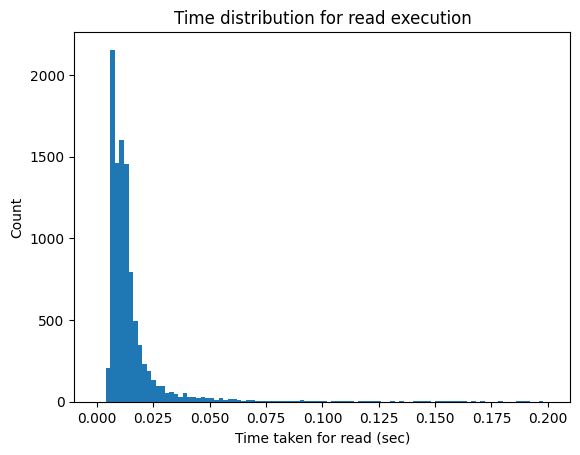

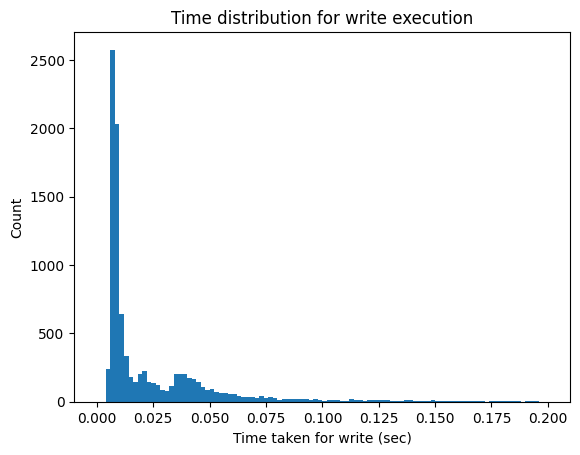

Total read_time: 429.0096044540405
Total write_time: 1167.274780035019


In [26]:
plt.hist(read_times, 100, (0,0.2))
plt.xlabel("Time taken for read (sec)")
plt.ylabel("Count")
plt.title("Time distribution for read execution")
plt.show()

plt.hist(write_times, 100, (0,0.2))
plt.xlabel("Time taken for write (sec)")
plt.ylabel("Count")
plt.title("Time distribution for write execution")
plt.show()

print(f"Total read_time: {sum(read_times)}")
print(f"Total write_time: {sum(write_times)}")

In [24]:
payload = {
    "n": 6,
    "servers": ["Server0", "Server1", "Server2", "Server3", "Server4", "Server5"],
}
res = requests.delete(f"{docker_url}/rm", json=payload)

### A-2. 6 servers, 4 shards, 6 replicas

In [ ]:
payload = {
    "N": 6,
    "schema": {
        "columns": ["Stud_id", "Stud_name", "Stud_marks"],
        "dtypes": ["Number", "String", "Number"],
    },
    "shards": [
        {"Stud_id_low": 0, "Shard_id": "sh1", "Shard_size": 4096},
        {"Stud_id_low": 4096, "Shard_id": "sh2", "Shard_size": 4096},
        {"Stud_id_low": 8192, "Shard_id": "sh3", "Shard_size": 4096},
        {"Stud_id_low": 12288, "Shard_id": "sh4", "Shard_size": 4096},
    ],
    "servers": {
        "Server0": ["sh1", "sh2", "sh3", "sh4"],
        "Server1": ["sh1", "sh2", "sh3", "sh4"],
        "Server2": ["sh1", "sh2", "sh3", "sh4"],
        "Server3": ["sh1", "sh2", "sh3", "sh4"],
        "Server4": ["sh1", "sh2", "sh3", "sh4"],
        "Server5": ["sh1", "sh2", "sh3", "sh4"],
    },
}
res = requests.post(f"{docker_url}/init", json=payload)
print(res.json())

In [ ]:
num_requests = 10000

write_times, read_times = [], []
max_stud_id = 16383


def make_read_request():
    low = random.randint(0, max_stud_id)
    payload = {"Stud_id": {"low": low, "high": low + 50}}
    start_time = time.time()
    res = requests.get(f"{docker_url}/read", json=payload)
    read_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in read")


def make_write_request():
    payload = {
        "data": [
            {
                "Stud_id": random.randint(0, max_stud_id),
                "Stud_name": "GHI",
                "Stud_marks": random.randint(0, 100),
            },
        ]
    }
    start_time = time.time()
    res = requests.post(f"{docker_url}/write", json=payload)
    write_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in write")


for i in range(num_requests):
    make_read_request()
    make_write_request()
    if i % 1000 == 0:
        print(f"Remaining {num_requests-i-1}")

In [ ]:
plt.hist(read_times, 100, (0,0.2))
plt.xlabel("Time taken for read (sec)")
plt.ylabel("Count")
plt.title("Time distribution for read execution")
plt.show()

plt.hist(write_times, 100, (0,0.2))
plt.xlabel("Time taken for write (sec)")
plt.ylabel("Count")
plt.title("Time distribution for write execution")
plt.show()

print(f"Total read_time: {sum(read_times)}")
print(f"Total write_time: {sum(write_times)}")

### A-3. 10 servers, 6 shards, 8 replicas

In [28]:
payload = {
    "N": 10,
    "schema": {
        "columns": ["Stud_id", "Stud_name", "Stud_marks"],
        "dtypes": ["Number", "String", "Number"],
    },
    "shards": [
        {"Stud_id_low": 0, "Shard_id": "sh1", "Shard_size": 4096},
        {"Stud_id_low": 4096, "Shard_id": "sh2", "Shard_size": 4096},
        {"Stud_id_low": 8192, "Shard_id": "sh3", "Shard_size": 4096},
        {"Stud_id_low": 12288, "Shard_id": "sh4", "Shard_size": 4096},
        {"Stud_id_low": 16384, "Shard_id": "sh5", "Shard_size": 4096},
        {"Stud_id_low": 20480, "Shard_id": "sh6", "Shard_size": 4096},
    ],
    "servers": {
        "Server0": ["sh1", "sh2", "sh4", "sh6"],
        "Server1": ["sh2", "sh3", "sh4", "sh5"],
        "Server3": ["sh1", "sh3", "sh5", "sh6"],
        "Server4": ["sh4", "sh2", "sh5", "sh6"],
        "Server5": ["sh1", "sh4", "sh5"],
        "Server6": ["sh3", "sh2", "sh6"],
        "Server7": ["sh1", "sh3", "sh4", "sh6"],
        "Server7": ["sh3", "sh2", "sh5"],
        "Server9": ["sh1", "sh3", "sh4", "sh6"],
        "Server1": ["sh1", "sh2", "sh5"],
    },
}
res = requests.post(f"{docker_url}/init", json=payload)
print(res.json())

{'message': 'Configured Database', 'status': 'success'}


In [29]:
num_requests = 10000

write_times, read_times = [], []
max_stud_id = 24575


def make_read_request():
    low = random.randint(0, max_stud_id)
    payload = {"Stud_id": {"low": low, "high": low + 50}}
    start_time = time.time()
    res = requests.get(f"{docker_url}/read", json=payload)
    read_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in read")


def make_write_request():
    payload = {
        "data": [
            {
                "Stud_id": random.randint(0, max_stud_id),
                "Stud_name": "GHI",
                "Stud_marks": random.randint(0, 100),
            },
        ]
    }
    start_time = time.time()
    res = requests.post(f"{docker_url}/write", json=payload)
    write_times.append(time.time() - start_time)
    if res.status_code != 200:
        print(f"Error {res.status_code} in write")


for i in range(num_requests):
    make_read_request()
    make_write_request()
    if i % 1000 == 0:
        print(f"Remaining {num_requests-i-1}")

Error 500 in write
Remaining 9999
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in read
Error 500 in write
Error 500 in write
Error 500 in read
Error 500 in read
Error 500

KeyboardInterrupt: 

In [ ]:
plt.hist(read_times, 100, (0,0.5))
plt.show()

plt.hist(write_times, 100, (0,0.5))
plt.show()

print(f"Total read_time: {sum(read_times)}")
print(f"Total write_time: {sum(write_times)}")